<b>Eficiência na Rota de Entrega</b><br>
Propor um modelo que otimize as rotas de entrega para minimizar os custos e o tempo de entrega, considerando variáveis como tráfego e distâncias.

Para construção do modelo usaremos: <i><b>Grafos Python</i></b><br>
A importância dos grafos na programação reside no fato de que eles fornecem uma maneira eficiente de modelar e resolver problemas complexos. Um exemplo prático da importância dos grafos é na otimização de rotas. Imagine que você precise encontrar o caminho mais curto entre dois pontos em uma cidade. Com a ajuda de grafos, podemos representar as ruas como arestas e os cruzamentos como vértices, permitindo-nos encontrar a rota mais eficiente, considerando restrições como distância, tempo ou custo.

In [1]:
#Importando os pacotes das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx # NetworkX é um pacote Python para a criação, manipulação, e estudo da estrutura, dinâmica e funções de redes complexas.

In [8]:
# Gerar dados para eficiência na rota de entregas
np.random.seed(2)

entregas_data = pd.DataFrame({
    'ID Entrega': range(1, 101),
    'ID do Veículo': np.random.choice(['V1', 'V2', 'V3', 'V4'], 100),
    'Local de Partida': np.random.choice(['CD1', 'CD2', 'CD3'], 100),
    'Destino da Entrega': np.random.choice(['Local A', 'Local B', 'Local C', 'Local D', 'Local E'], 100),
    'Distância': np.random.uniform(10, 300, 100), # Distância em Km
    'Tempo Estimado de Viagem': np.random.uniform(30, 240, 100), # Tempo em minutos
    'Condições de Tráfego': np.random.choice(['Baixo', 'Médio', 'Alto'], 100)
})
entregas_data.head()

,ID Entrega,ID do Veículo,Local de Partida,Destino da Entrega,Distância,Tempo Estimado de Viagem,Condições de Tráfego
0,1,V1,CD3,Local E,236.287542,129.517510,Alto
1,2,V4,CD1,Local C,133.532678,150.633732,Médio
2,3,V2,CD3,Local A,110.368464,117.425770,Médio
3,4,V1,CD2,Local D,166.362959,57.964237,Baixo
4,5,V3,CD1,Local D,135.052033,99.437949,Alto


#### 📌Criando um garfo direcionado (DiGraph) onde as conexões têm um sentido único de origem para destino

Iteramos sobre cada linha do DataFrame para adicionar arestas ao grafo. A cada conexão, atribuímos um peso baseado nas condições de tráfego e usamos esse peso ajustado para definir o custo das rotas no grafo:<br>
✔ Baixo tráfego → Peso = 1 (sem impacto na distância)<br>
✔ Médio tráfego → Peso = 1.2 (acréscimo de 20% na distância)<br>
✔ Alto tráfego → Peso = 1.5 (acréscimo de 50%)<br>
✔ Utilizamos .map() para calcular "Distância Total Ajustada" de forma mais eficiente.<br>


In [9]:
# Criando um grafo com os pontos de entrega
G = nx.DiGraph()

# Dicionário de pesos de tráfego
pesos_trafego = {'Baixo': 1, 'Médio': 1.2, 'Alto': 1.5}

# Adicionando arestas ao grafo
for _, row in entregas_data.iterrows():
    G.add_edge(row['Local de Partida'], row['Destino da Entrega'], weight=row['Distância'] * pesos_trafego[row['Condições de Tráfego']])

# Criando a coluna "Distância Total Ajustada" diretamente no DataFrame
entregas_data['Distância Total Ajustada'] = entregas_data['Distância'] * entregas_data['Condições de Tráfego'].map(pesos_trafego)
entregas_data.head()

,ID Entrega,ID do Veículo,Local de Partida,Destino da Entrega,Distância,Tempo Estimado de Viagem,Condições de Tráfego,Distância Total Ajustada
0,1,V1,CD3,Local E,236.287542,129.517510,Alto,354.431313
1,2,V4,CD1,Local C,133.532678,150.633732,Médio,160.239214
2,3,V2,CD3,Local A,110.368464,117.425770,Médio,132.442157
3,4,V1,CD2,Local D,166.362959,57.964237,Baixo,166.362959
4,5,V3,CD1,Local D,135.052033,99.437949,Alto,202.578049


#### 📌 Função para calcular a melhor rota entre dois pontos

✔ Utilizamos o algoritmo de menor caminho (shortest_path) do NetworkX, considerando os pesos das arestas.<br>
✔ Retorna o caminho ótimo e o custo total (distância ajustada pelo tráfego).<br>
✔ Se não houver rota disponível entre os pontos, retorna uma mensagem informando isso.<br>

In [10]:
# Função para calcular a melhor rota entre dois pontos
def melhor_rota(origem, destino):
    try:
        caminho = nx.shortest_path(G, source=origem, target=destino, weight='weight')
        distancia_total = nx.shortest_path_length(G, source=origem, target=destino, weight='weight')
        return caminho, distancia_total
    except nx.NetworkXNoPath:
        return f"Não há rota disponível entre {origem} e {destino}."

A nova coluna <b>Melhor Rota</b> conterá o trajeto entre o ponto de partida e o destino ajustado pelas condições do grafo.
Se não houver caminho, adicionamos a mensagem "Rota não disponível"


In [11]:
# Criando uma nova coluna com o melhor caminho como string
rotas = []
for _, row in entregas_data.iterrows():
    resultado = melhor_rota(row['Local de Partida'], row['Destino da Entrega'])
    if isinstance(resultado, tuple):
        caminho, _ = resultado
        rotas.append(" → ".join(caminho))
    else:
        rotas.append("Rota não disponível")

entregas_data['Melhor Rota'] = rotas

# Visualizando o resultado
print(entregas_data[['Local de Partida', 'Destino da Entrega', 'Melhor Rota']].head())

  Local de Partida Destino da Entrega    Melhor Rota
0              CD3            Local E  CD3 → Local E
1              CD1            Local C  CD1 → Local C
2              CD3            Local A  CD3 → Local A
3              CD2            Local D  CD2 → Local D
4              CD1            Local D  CD1 → Local D


#### 📌Vamos utilizar Matplotlib e NetworkX para gerar um gráfico visualizando os centros de distribuição e os destinos das entregas:
✔ Nós: Representam os centros de distribuição e locais de entrega.<br>
✔ Arestas: Conexões entre os pontos, indicando as possíveis rotas.<br>
✔ Pesos nas arestas: Distância ajustada pelo tráfego.

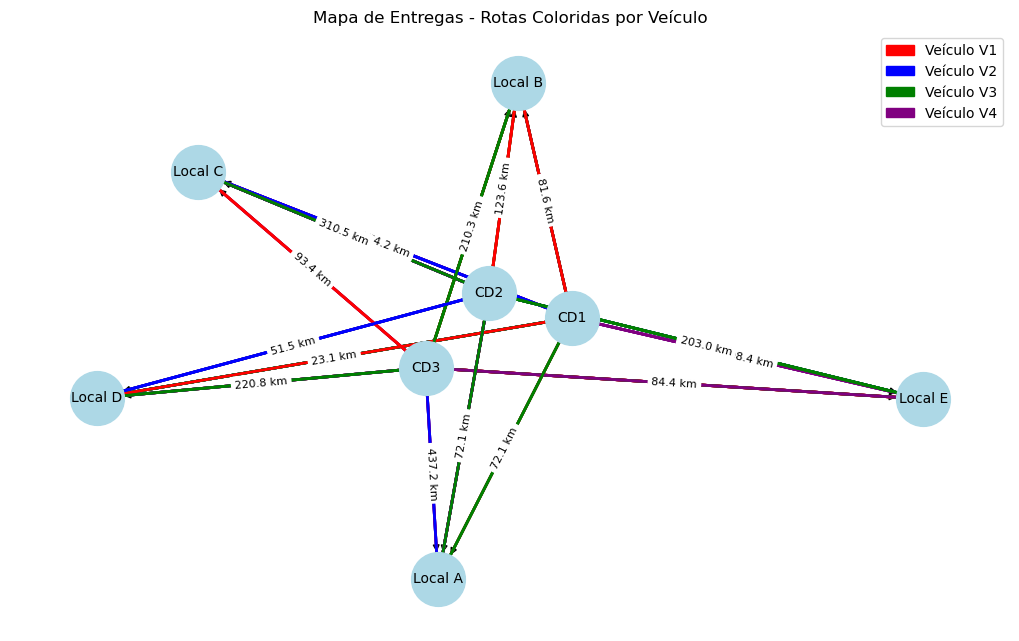

In [24]:
# Criando um dicionário de cores para cada veículo
cores_veiculos = {'V1': 'red', 'V2': 'blue', 'V3': 'green', 'V4': 'purple'}

# Criando a figura e eixo
plt.figure(figsize=(10, 6))

# Posição dos nós
pos = nx.spring_layout(G, seed=2)  # Distribuição dos nós

# Desenhando os nós
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=10)

# Adicionando as arestas coloridas por veículo
for _, row in entregas_data.iterrows():
    origem = row['Local de Partida']
    destino = row['Destino da Entrega']
    cor = cores_veiculos[row['ID do Veículo']]  # Escolhe cor com base no veículo
    nx.draw_networkx_edges(G, pos, edgelist=[(origem, destino)], edge_color=cor, width=2)

# Adicionando pesos (distância ajustada) nas arestas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.1f} km" for k, v in labels.items()}, font_size=8)

# Criando a legenda
patches = [mpatches.Patch(color=cor, label=f'Veículo {veiculo}') for veiculo, cor in cores_veiculos.items()]
plt.legend(handles=patches, loc="upper right")

# Exibindo o gráfico
plt.title("Mapa de Entregas - Rotas Coloridas por Veículo")
plt.show()